In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("/Users/sritanvemuru/Downloads/NautralSciences_Dataset.xlsx")

In [3]:
df = data[["FIRE_YEAR", "FIRE_SIZE", "LATITUDE", "LONGITUDE", "FIRE_SIZE_CLASS"]]
df

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,FIRE_SIZE_CLASS
0,2010,70.0,36.766944,-121.303056,C
1,2010,0.5,36.776944,-121.311111,B
2,2010,0.1,36.856111,-121.381111,A
3,2010,0.1,36.818056,-121.391111,A
4,2010,1.0,36.883056,-121.561944,B
...,...,...,...,...,...
937967,2000,1000.0,21.473209,-158.164902,F
937968,2000,300.0,21.429390,-157.988983,E
937969,2000,0.1,20.697201,-156.329453,A
937970,2000,1.0,20.806150,-156.283310,B


In [62]:
df = df.loc[(df["FIRE_SIZE_CLASS"] != "A") & (df["FIRE_SIZE_CLASS"] != "B") & (df["FIRE_SIZE_CLASS"] != "C")]
df

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,FIRE_SIZE_CLASS
25,2010,200.0,36.851111,-120.563056,D
42,2010,250.0,36.851111,-120.563056,D
74,2010,350.0,36.733889,-120.223056,E
93,2010,275.0,37.038056,-119.648889,D
201,2010,160.0,36.138056,-120.163889,D
...,...,...,...,...,...
937861,2000,1005.0,37.519270,-92.787480,F
937881,2000,723.0,37.906490,-94.018650,E
937967,2000,1000.0,21.473209,-158.164902,F
937968,2000,300.0,21.429390,-157.988983,E


In [5]:
df.to_csv('/Users/sritanvemuru/Downloads/BigWildfires.csv')

In [63]:
avg_fire = {}
year = 2000
while year < 2011:
    avg_df = df[df["FIRE_YEAR"] == year]
    mean = avg_df["FIRE_SIZE"].sum()
    avg_fire[year] = mean
    year += 1

In [64]:
avg_fire

{2000: 7180721.009,
 2001: 3379542.6799999997,
 2002: 6487001.21,
 2003: 4237479.08018,
 2004: 7940503.71015,
 2005: 9243655.65202,
 2006: 9441370.86995,
 2007: 8852001.77015,
 2008: 5013144.73986,
 2009: 5703778.45999,
 2010: 3141210.93}

In [65]:
import matplotlib.pyplot as plt

In [66]:
avg_fire_df = pd.DataFrame(list(avg_fire.items()), columns=["Year", "Total_Fire_Size"])
avg_fire_df

,Year,Total_Fire_Size
0,2000,7.180721e+06
1,2001,3.379543e+06
2,2002,6.487001e+06
3,2003,4.237479e+06
4,2004,7.940504e+06
5,2005,9.243656e+06
6,2006,9.441371e+06
7,2007,8.852002e+06
8,2008,5.013145e+06
9,2009,5.703778e+06


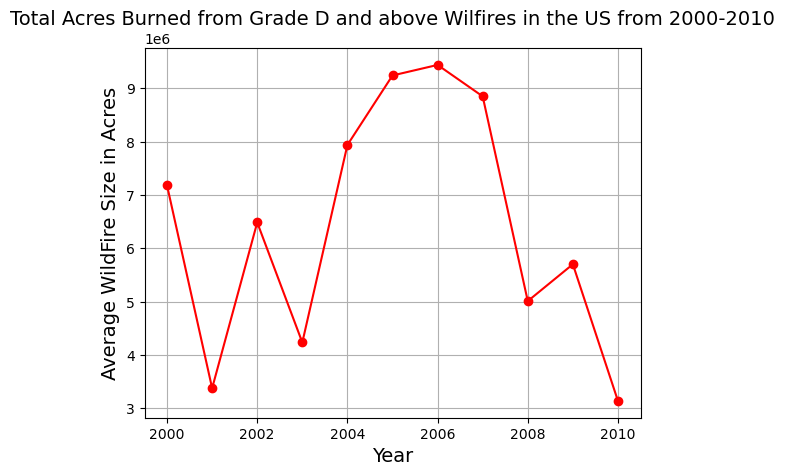

In [67]:
plt.plot(avg_fire_df['Year'], avg_fire_df['Total_Fire_Size'], color='red', marker='o')
plt.title('Total Acres Burned from Grade D and above Wilfires in the US from 2000-2010', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average WildFire Size in Acres', fontsize=14)
plt.grid("True")
plt.show()

In [68]:
freq_fire = {}
year = 2000
while year < 2011:
    avg_df = df[df["FIRE_YEAR"] == year]
    freq_fire[year] = avg_df.shape[0]
    year += 1

In [69]:
freq_fire

{2000: 3132,
 2001: 2232,
 2002: 1783,
 2003: 1781,
 2004: 1385,
 2005: 2768,
 2006: 4339,
 2007: 2772,
 2008: 3168,
 2009: 2457,
 2010: 2128}

In [70]:
avg_df_freq = pd.DataFrame(list(freq_fire.items()), columns=["Year", "Number of Fires"])
avg_df_freq

,Year,Number of Fires
0,2000,3132
1,2001,2232
2,2002,1783
3,2003,1781
4,2004,1385
5,2005,2768
6,2006,4339
7,2007,2772
8,2008,3168
9,2009,2457


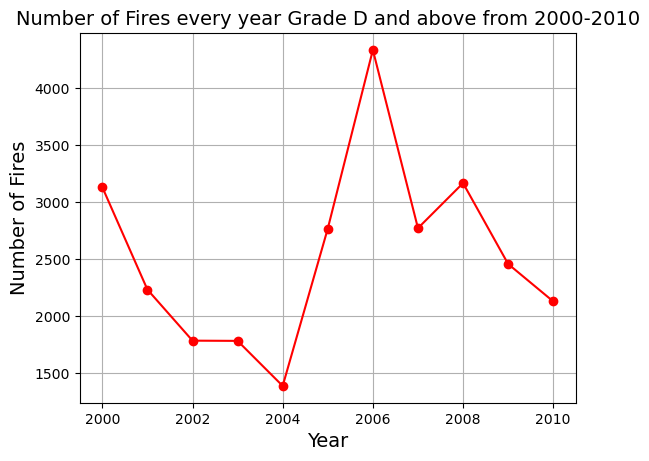

In [71]:
plt.plot(avg_df_freq['Year'], avg_df_freq['Number of Fires'], color='red', marker='o')
plt.title('Number of Fires every year Grade D and above from 2000-2010', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Fires', fontsize=14)
plt.grid("True")
plt.show()

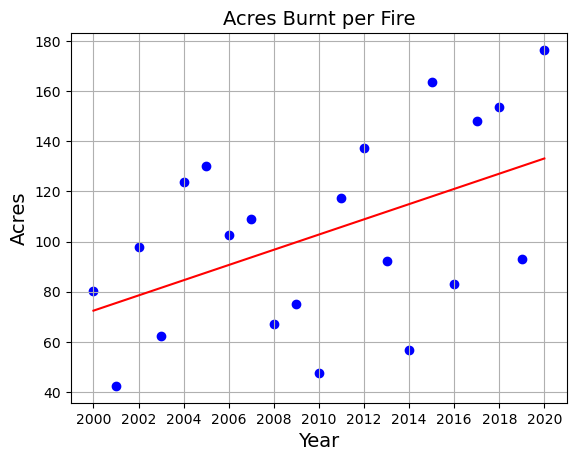

In [72]:
df = pd.read_excel("/Users/sritanvemuru/Downloads/Acres Burned Per Fire.xlsx")
plt.scatter(df['Year'], df['Acres Burned Per Fire'], color='blue', marker='o')
plt.title('Acres Burnt per Fire', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Acres', fontsize=14)
plt.grid("True")
plt.xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])
coefficients = np.polyfit(df['Year'], df['Acres Burned Per Fire'], 1)
m, c = coefficients
y_fit = m * df['Year'] + c
plt.plot(df['Year'], y_fit, 'r')
plt.show()